In [19]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pysal
import cartopy
import geoplot
import osmnx
import folium
import dash
import rasterio
import rasterio.plot as rioplot
import osmnx
import contextily as ctx

In [2]:
fp = 'Transit_Routes_for_King_County_Metro__transitroute_line.shp'
data = gpd.read_file(fp)
data.crs

{'init': 'epsg:4326'}

In [3]:
data.head()

,OBJECTID,CHANGE_NUM,MINOR_CHAN,CURRENT_NE,IN_SERVICE,ROUTE_ID,LOCAL_EXPR,ROUTE_NUM,SHAPE_Leng,geometry
0,1,140,9,IN SERVICE,Y,100001,L,1,41865.741523,(LINESTRING (-122.3177497499018 47.59919807859...
1,2,140,9,IN SERVICE,Y,100002,L,10,28586.528817,(LINESTRING (-122.3377930449671 47.60974983276...
2,3,140,9,IN SERVICE,Y,100005,L,106,100783.176936,(LINESTRING (-122.217189050582 47.481347612252...
3,4,140,9,IN SERVICE,Y,100003,L,101,133635.072181,(LINESTRING (-122.2124335193708 47.47168644391...
4,5,140,9,IN SERVICE,Y,100004,L,105,36236.825215,(LINESTRING (-122.2029776399569 47.48214733583...


In [4]:
dat = data[data['IN_SERVICE']=='Y']

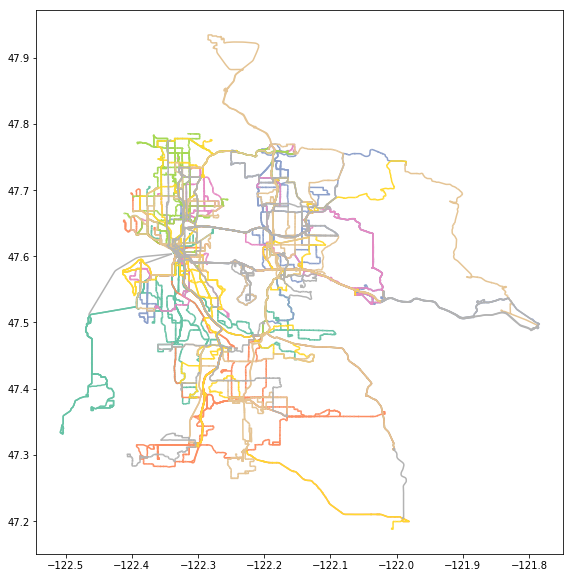

In [15]:
dat.plot(cmap='Set2', figsize=(10, 10))

In [6]:
dat.geom_type.head()

0    MultiLineString
1    MultiLineString
2    MultiLineString
3    MultiLineString
4    MultiLineString
dtype: object

In [7]:
dat.geometry.bounds.head()

,minx,miny,maxx,maxy
0,-122.370416,47.599189,-122.317750,47.645857
1,-122.339813,47.599196,-122.311901,47.634133
2,-122.328035,47.479702,-122.207855,47.599210
3,-122.338489,47.471297,-122.202988,47.614514
4,-122.208025,47.479663,-122.164171,47.507331


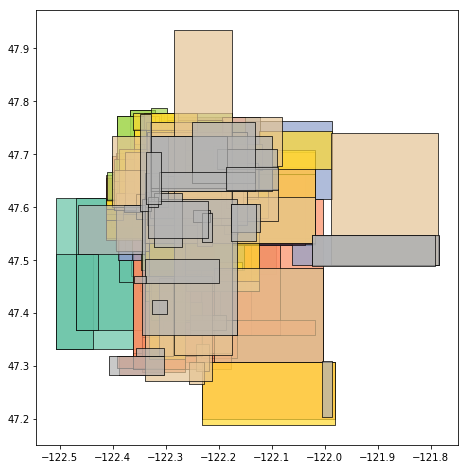

In [8]:
dat.envelope.plot(cmap='Set2', figsize=(8, 8), alpha=0.7, edgecolor='black')

C:\Users\Yohan_Min\Anaconda3\lib\site-packages\geopandas\geodataframe.py:455: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



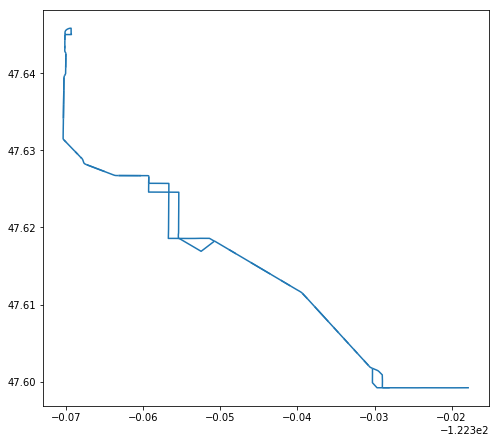

In [9]:
dat[data['ROUTE_ID'] == 100001].plot(figsize=(8, 8))

In [11]:
grid_fp = "data.shp"
grid = gpd.read_file(grid_fp)

print(grid.crs)
print(grid.head(2))

{'init': 'epsg:4326'}
    2010_Censu    2010_Cen_1    2010_Cen_2    2010_Cen_3    2010_Cen_4  \
0  53033000100  3.440312e+07  23925.247095  19731.620749  1.990361e+07   
1  53033000200  3.537106e+07  24111.645835  24111.645835  3.537106e+07   

    county_sim  county_s_1 county_s_2  county_s_3  county_s_4  county_s_5  \
0  53033000100    0.070703      44951      0.5406      6918.0    0.855726   
1  53033000200    0.041828      56208      0.4115      7974.0    0.726076   

   county_s_6  county_s_7  county_s_8  \
0    0.065915           1    1.910584   
1    0.030297           0    3.286321   

                                            geometry  
0  POLYGON ((-122.2841872052759 47.73360555058854...  
1  POLYGON ((-122.3019538169408 47.73382983145742...  


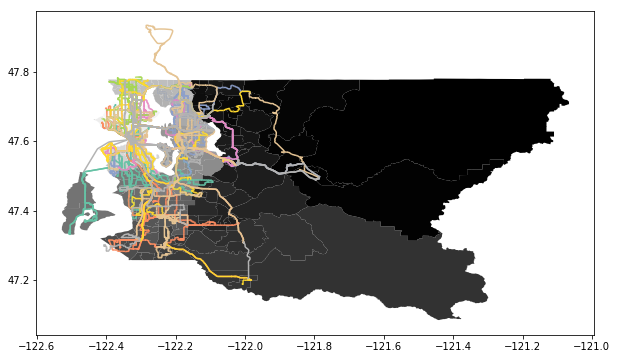

In [32]:
ax = grid.plot(cmap='Greys', figsize=(10, 10))
dat.plot(ax=ax, cmap='Set2')

In [29]:
lidar = 'king_county_2016_dtm_66.tif'
pt = rasterio.open(lidar)
print(pt.meta)
print(pt.res)
print(pt.crs)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 10622, 'height': 15443, 'count': 1, 'crs': CRS({'proj': 'lcc', 'lat_1': 45.83333333333334, 'lat_2': 47.33333333333334, 'lat_0': 45.33333333333334, 'lon_0': -120.5, 'x_0': 500000.0000000002, 'y_0': 0, 'ellps': 'GRS80', 'units': 'us-ft', 'no_defs': True}), 'transform': Affine(3.0, 0.0, 1177721.0,
       0.0, -3.0, 886798.0)}
(3.0, 3.0)
+ellps=GRS80 +lat_0=45.33333333333334 +lat_1=45.83333333333334 +lat_2=47.33333333333334 +lon_0=-120.5 +no_defs +proj=lcc +units=us-ft +x_0=500000.0000000002 +y_0=0


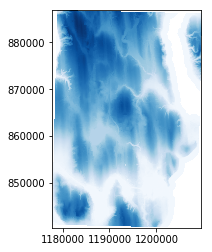

In [30]:
rioplot.show(pt, with_bounds=True, cmap=plt.cm.Blues)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
data.plot(ax=ax1, facecolor='gray');

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor='blue');

# Remove empty white space around the plot
plt.tight_layout()

In [ ]:
import rasterio 
from rasterio.plot import show
import numpy as np
import os

In [ ]:
with rasterio.open('king_county_2016_dtm_66.tif') as lidar_dem:
    lidar_dem.bounds